**Fecha:** 03-02-2025

**Autor:** Kevin S. Calderon

**Materia:** Procesamientos de datos a gran escala

**Tópico:** Introducción a PySpark en el ambiente DataBricks


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pyspark.sql import SQLContext
from pyspark.sql.types import *
from pyspark.sql.functions import mean, col, split, count, when, lit, isnan

In [0]:
spark

In [0]:
#url= "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/refs/heads/main/Varios/stroke_pyspark.csv"

df00 = spark.read.table("default.stroke_pyspark_3_csv")
display(df00)

id gender age hypertension heart_disease ever_married work_type Residence_type avg_glucose_level bmi smoking_status stroke 9046 Male 67 0 1 Yes Private Urban 228.69 36.6 formerly smoked 1 51676 Female 61 0 0 Yes Self-employed Rural 202.21 N/A never smoked 1 31112 Male 80 0 1 Yes Private Rural 105.92 32.5 never smoked 1 60182 Female 49 0 0 Yes Private Urban 171.23 34.4 smokes 1 1665 Female 79 1 0 Yes Self-employed Rural 174.12 24 never smoked 1 56669 Male 81 0 0 Yes Private Urban 186.21 29 formerly smoked 1 53882 Male 74 1 1 Yes Private Rural 70.09 27.4 never smoked 1 10434 Female 69 0 0 No Private Urban 94.39 22.8 never smoked 1 27419 Female 59 0 0 Yes Private Rural 76.15 N/A Unknown 1 60491 Female 78 0 0 Yes Private Urban 58.57 24.2 Unknown 1 12109 Female 81 1 0 Yes Private Rural 80.43 29.7 never smoked 1 12095 Female 61 0 1 Yes Govt_job Rural 120.46 36.8 smokes 1 12175 Female 54 0 0 Yes Private Urban 104.51 27.3 smokes 1 8213 Male 78 0 1 Yes Private Urban 219.84 N/A Unknown 1 5317 Female 79 0 1 Yes Private Urban 214.09 28.2 never smoked 1 58202 Female 50 1 0 Yes Self-employed Rural 167.41 30.9 never smoked 1 56112 Male 64 0 1 Yes Private Urban 191.61 37.5 smokes 1 34120 Male 75 1 0 Yes Private Urban 221.29 25.8 smokes 1 27458 Female 60 0 0 No Private Urban 89.22 37.8 never smoked 1 25226 Male 57 0 1 No Govt_job Urban 217.08 N/A Unknown 1 70630 Female 71 0 0 Yes Govt_job Rural 193.94 22.4 smokes 1 13861 Female 52 1 0 Yes Self-employed Urban 233.29 48.9 never smoked 1 68794 Female 79 0 0 Yes Self-employed Urban 228.7 26.6 never smoked 1 64778 Male 82 0 1 Yes Private Rural 208.3 32.5 Unknown 1 4219 Male 71 0 0 Yes Private Urban 102.87 27.2 formerly smoked 1 70822 Male 80 0 0 Yes Self-employed Rural 104.12 23.5 never smoked 1 38047 Female 65 0 0 Yes Private Rural 100.98 28.2 formerly smoked 1 61843 Male 58 0 0 Yes Private Rural 189.84 N/A Unknown 1 54827 Male 69 0 1 Yes Self-employed Urban 195.23 28.3 smokes 1 69160 Male 59 0 0 Yes Private Rural 211.78 N/A formerly smoked 1 43717 Male 57 1 0 Yes Private Urban 212.08 44.2 smokes 1 33879 Male 42 0 0 Yes Private Rural 83.41 25.4 Unknown 1 39373 Female 82 1 0 Yes Self-employed Urban 196.92 22.2 never smoked 1 54401 Male 80 0 1 Yes Self-employed Urban 252.72 30.5 formerly smoked 1 14248 Male 48 0 0 No Govt_job Urban 84.2 29.7 never smoked 1 712 Female 82 1 1 No Private Rural 84.03 26.5 formerly smoked 1 47269 Male 74 0 0 Yes Private Rural 219.72 33.7 formerly smoked 1 24977 Female 72 1 0 Yes Private Rural 74.63 23.1 formerly smoked 1 47306 Male 58 0 0 No Private Rural 92.62 32 Unknown 1 62602 Female 49 0 0 Yes Private Urban 60.91 29.9 never smoked 1 4651 Male 78 0 0 Yes Private Rural 78.03 23.9 formerly smoked 1 1261 Male 54 0 0 Yes Private Urban 71.22 28.5 never smoked 1 61960 Male 82 0 1 Yes Private Urban 144.9 26.4 smokes 1 1845 Female 63 0 0 Yes Private Urban 90.9 N/A formerly smoked 1 7937 Male 60 1 0 Yes Govt_job Urban 213.03 20.2 smokes 1 19824 Male 76 1 0 Yes Private Rural 243.58 33.6 never smoked 1 37937 Female 75 0 1 No Self-employed Urban 109.78 N/A Unknown 1 47472 Female 58 0 0 Yes Private Urban 107.26 38.6 formerly smoked 1 35626 Male 81 0 0 Yes Self-employed Urban 99.33 33.7 never smoked 1 36338 Female 39 1 0 Yes Private Rural 58.09 39.2 smokes 1 18587 Female 76 0 0 No Private Urban 89.96 N/A Unknown 1 15102 Male 78 1 0 Yes Private Urban 75.32 N/A formerly smoked 1 59190 Female 79 0 1 Yes Private Rural 127.29 27.7 never smoked 1 47167 Female 77 1 0 Yes Self-employed Urban 124.13 31.4 never smoked 1 8752 Female 63 0 0 Yes Govt_job Urban 197.54 N/A never smoked 1 25831 Male 63 0 1 Yes Private Rural 196.71 36.5 formerly smoked 1 38829 Female 82 0 0 Yes Private Rural 59.32 33.2 never smoked 1 66400 Male 78 0 0 Yes Private Urban 237.75 N/A formerly smoked 1 58631 Male 73 1 0 Yes Self-employed Urban 194.99 32.8 never smoked 1 5111 Female 54 1 0 Yes Govt_job Urban 180.93 27.7 never smoked 1 10710 Female 56 0 0 Yes Private Urban 185.17 40.4 formerly smoked 1 55927 Female 80 1 0

1- Se cambian los nombres de las columnas

In [0]:
nuevosNombres =['id','genero','edad','hipertension','enfCardiaca','EdoCivil','trabajo','residencia','nivelGlucosa','IMC','Fumador','ParoCardiaco']
df01=df00
for antes, nuevo in zip(df00.columns, nuevosNombres):
    df01 = df01.withColumnRenamed(antes,nuevo)
df01.columns

['id',
 'genero',
 'edad',
 'hipertension',
 'enfCardiaca',
 'EdoCivil',
 'trabajo',
 'residencia',
 'nivelGlucosa',
 'IMC',
 'Fumador',
 'ParoCardiaco']

2. Revisión de Tipo de Datos


In [0]:
df01.printSchema

<bound method DataFrame.printSchema of DataFrame[id: string, genero: string, edad: string, hipertension: string, enfCardiaca: string, EdoCivil: string, trabajo: string, residencia: string, nivelGlucosa: string, IMC: string, Fumador: string, ParoCardiaco: string]>

En relación a la coherencia de los datos, se procede a:

- El tipo de dato "IMC", se pasa a tipo de dato "Double"
- El tipo de dato "Edad", se pasa a tipo de dato "Integer"

In [0]:
df01 = df01.withColumn("edad", df01.edad.cast("Int"))
df01 = df01.withColumn("IMC", df01.IMC.cast("double"))
df01.printSchema()

root
 |-- id: string (nullable = true)
 |-- genero: string (nullable = true)
 |-- edad: integer (nullable = true)
 |-- hipertension: string (nullable = true)
 |-- enfCardiaca: string (nullable = true)
 |-- EdoCivil: string (nullable = true)
 |-- trabajo: string (nullable = true)
 |-- residencia: string (nullable = true)
 |-- nivelGlucosa: string (nullable = true)
 |-- IMC: double (nullable = true)
 |-- Fumador: string (nullable = true)
 |-- ParoCardiaco: string (nullable = true)



In [0]:
df01.show(10)

+-----+------+----+------------+-----------+--------+-------------+----------+------------+----+---------------+------------+
|   id|genero|edad|hipertension|enfCardiaca|EdoCivil|      trabajo|residencia|nivelGlucosa| IMC|        Fumador|ParoCardiaco|
+-----+------+----+------------+-----------+--------+-------------+----------+------------+----+---------------+------------+
| 9046|  Male|  67|           0|          1|     Yes|      Private|     Urban|      228.69|36.6|formerly smoked|           1|
|51676|Female|  61|           0|          0|     Yes|Self-employed|     Rural|      202.21|NULL|   never smoked|           1|
|31112|  Male|  80|           0|          1|     Yes|      Private|     Rural|      105.92|32.5|   never smoked|           1|
|60182|Female|  49|           0|          0|     Yes|      Private|     Urban|      171.23|34.4|         smokes|           1|
| 1665|Female|  79|           1|          0|     Yes|Self-employed|     Rural|      174.12|24.0|   never smoked|      

Revisión de datos Nulos o imposibles

In [0]:
df01.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df01.columns]).show()

+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
| id|genero|edad|hipertension|enfCardiaca|EdoCivil|trabajo|residencia|nivelGlucosa|IMC|Fumador|ParoCardiaco|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+
|  0|     0|   0|           0|          0|       0|      0|         0|           0|201|      0|           0|
+---+------+----+------------+-----------+--------+-------+----------+------------+---+-------+------------+



Se puede observar que la columna IMC presenta datos Nulos o imposibles. A pesar de que el porcentaje de datos nulos son muy bajos, se  requiere crear una estrategia para mutar o cambiar los datos, sin que sean eliminados.
- Se requiere hacer estratos promedios cada 10 años
- Los promedios por estratos se catalogan por género
- se sustituye el rpomedio de los nulos segun género/estrato_edad

In [0]:
#Obtener cantida total de registros
df01.groupby(['genero']).count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
| Other|    1|
|  Male| 2115|
+------+-----+



In [0]:
#e descarta el registro cuyo valor en genero es "other"
df02=df01.where("genero <> 'Other'")

In [0]:
df02.groupby(['genero']).count().show()

+------+-----+
|genero|count|
+------+-----+
|Female| 2994|
|  Male| 2115|
+------+-----+



In [0]:
#Se extrae el promedio de IMC por Estrato de edades y "Female"
avg10F =df02.where((col('genero')== lit('Female')) & (col('edad')<10)).select(mean(col('IMC'))).collect()
print(avg10F)

[Row(avg(IMC)=18.687962962962963)]


In [0]:
df01.groupBy(['residencia']).count().show()

+----------+-----+
|residencia|count|
+----------+-----+
|     Urban| 2596|
|     Rural| 2514|
+----------+-----+



In [0]:
from pyspark.sql import functions as F
# Crear una columna de rangos de edad
df01 = df01.withColumn(
    "age_group", 
    F.when((df01["edad"] >= 0) & (df01["edad"] <= 1), "0-1")
    .when((df01["edad"] > 1) & (df01["edad"] <= 2), "1-2")
    .when((df01["edad"] > 2) & (df01["edad"] <= 3), "2-3")
    .when((df01["edad"] > 3) & (df01["edad"] <= 5), "3-5")
    .when((df01["edad"] > 5) & (df01["edad"] <= 10), "5-10")
    .when((df01["edad"] > 10) & (df01["edad"] <= 15), "10-15")
    .when((df01["edad"] > 15) & (df01["edad"] <= 20), "15-20")
    .when((df01["edad"] > 20) & (df01["edad"] <= 30), "20-30")
    .when((df01["edad"] > 30) & (df01["edad"] <= 40), "30-40")
    .when((df01["edad"] > 40) & (df01["edad"] <= 50), "40-50")
    .when((df01["edad"] > 50) & (df01["edad"] <= 60), "50-60")
    .when((df01["edad"] > 60) & (df01["edad"] <= 80), "60-80")
    .when((df01["edad"] > 80) & (df01["edad"] <= 90), "80-90")
    .when(df01["edad"] > 90, "90+")
)

# Filtrar por hombres y mujeres, agrupar por rango de edad y género, y calcular el promedio de IMC
df_avg_imc = df01.groupBy("genero", "age_group").agg(
    F.avg("IMC").alias("avg_IMC")
)

# Mostrar los resultados
df_avg_imc.show()

+------+---------+------------------+
|genero|age_group|           avg_IMC|
+------+---------+------------------+
|  Male|    30-40| 31.33171806167401|
|Female|    30-40| 31.16508313539193|
|  Male|    15-20| 27.26106194690265|
|Female|      0-1|18.048214285714284|
|Female|    15-20| 26.51937499999999|
|Female|      1-2| 18.98846153846154|
|Female|     5-10|19.233333333333338|
|Female|      3-5|18.680952380952384|
|  Male|    10-15| 23.33445378151261|
|Female|    80-90|28.101428571428578|
|Female|    20-30|28.640163934426226|
|  Male|      1-2|19.179310344827584|
|  Male|     5-10|19.482692307692304|
|  Male|    50-60|31.845664739884388|
| Other|    20-30|              22.4|
|  Male|      3-5|18.621428571428577|
|  Male|    60-80|30.203493449781654|
|  Male|    20-30|28.307100591715987|
|Female|    10-15|24.120000000000015|
|Female|    40-50| 30.94269662921346|
+------+---------+------------------+
only showing top 20 rows



In [0]:
# Filtrar por hombres y mujeres, agrupar por rango de edad y género, y calcular el promedio de IMC
df_avg_imc = df01.groupBy("genero", "age_group").agg(
    F.format_number(F.avg("IMC"), 2).alias("avg_IMC"))  # Limitar a 2 decimales

In [0]:
####### Se extrae promedio IMC por Estrato y Female
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')<10)).select(mean(col('IMC'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>10) & (col('edad')<20)).select(mean(col('edad'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>20) & (col('edad')<30)).select(mean(col('edad'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>30) & (col('edad')<40)).select(mean(col('edad'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>40) & (col('edad')<50)).select(mean(col('edad'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>50) & (col('edad')<60)).select(mean(col('edad'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>60) & (col('edad')<70)).select(mean(col('edad'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>70) & (col('edad')<80)).select(mean(col('edad'))).collect()
avg10F = df02.where((col('genero')== lit('Female')) & (col('edad')>80) & (col('edad')<90)).select(mean(col('edad'))).collect()

print(avg10F)

[Row(avg(edad)=81.46478873239437)]


In [0]:
df03 = df02.withColumn("IMC", 
    when((df02['genero'] == 'Female') & (df02['IMC'].isNull()) & (df02['edad'] < 10), avg10F[0][0])
    .otherwise(df02['IMC'])
)

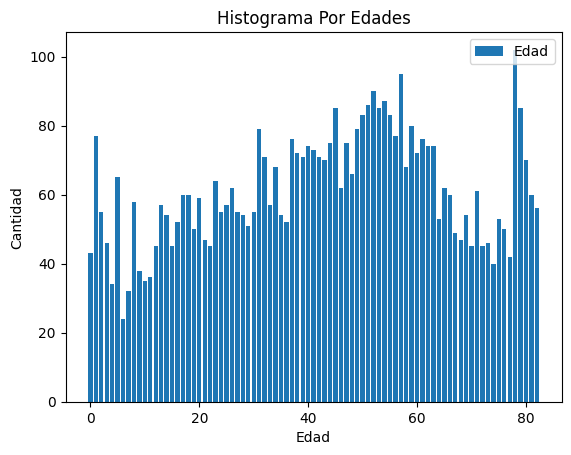

In [0]:
###Grafica Columna 
### Edad ###
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# 🔹 INICIAR SPARK (Si estás usando PySpark)
try:
    spark
except NameError:
    spark = SparkSession.builder.appName("MiApp").getOrCreate()

# 🔹 CARGAR DATOS (Si df01 no existe)
try:
    df01
except NameError:
    # Si df01 no está definido, crear un DataFrame de ejemplo
    data = {"edad": [25, 30, 35, 25, 40, 30, 30, 25, 35, 40, 40, 25]}
    df01 = pd.DataFrame(data)

# 🔹 DETECTAR SI df01 ES DE PANDAS O PYSPARK
if isinstance(df01, pd.DataFrame):
    # ✅ SI ES PANDAS
    df_grouped = df01.groupby("edad").size().reset_index(name="cantidad")
    edades = df_grouped["edad"]
    cantidades = df_grouped["cantidad"]

elif "pyspark.sql.dataframe.DataFrame" in str(type(df01)):
    # ✅ SI ES PYSPARK
    df_grouped = df01.groupBy("edad").count().orderBy("edad")
    df_pandas = df_grouped.toPandas()  # Convertir a Pandas
    edades = df_pandas["edad"]
    cantidades = df_pandas["count"]

else:
    raise TypeError("df01 no es un DataFrame válido de Pandas o PySpark")

# 🔹 CREAR EL HISTOGRAMA
plt.bar(edades, cantidades)

# 🔹 ETIQUETAS Y FORMATO
plt.ylabel("Cantidad")
plt.xlabel("Edad")
plt.title("Histograma Por Edades")
plt.legend(["Edad"], loc="upper right")

# 🔹 MOSTRAR EL GRÁFICO
plt.show()

In [0]:
#FUNCION PARA PROMEDIO DE IMC para la edad x con genero x
from pyspark.sql import functions as F
from pyspark.sql.functions import lit, mean

# Función para obtener el promedio de IMC por género y estratos de edad
def avg_imc_by_age_and_gender(df, gender, age_ranges):
    # List para almacenar los resultados
    results = []
    
    for age_range in age_ranges:
        # Desglosar el rango de edad
        lower, upper = age_range
        
        # Filtrar por género y el rango de edad, luego calcular el promedio de IMC
        avg_imc = df.where(
            (df["genero"] == lit(gender)) &
            (df["edad"] > lower) & (df["edad"] <= upper)
        ).select(mean("IMC")).collect()
        
        # Almacenar el resultado con la etiqueta del rango de edad
        results.append({
            "age_range": f"{lower}-{upper}",
            "avg_imc": avg_imc[0][0] if avg_imc else None
        })
    
    return results

# Ejemplo de uso
age_ranges = [(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), (50, 60), (60, 70), (70, 80), (80, 90)]
gender = "Female"

# Llamada a la función
results = avg_imc_by_age_and_gender(df02, gender, age_ranges)

# Mostrar los resultados
for result in results:
    print(f"Rango de Edad {result['age_range']}: Promedio IMC = {result['avg_imc']}")

Rango de Edad 0-10: Promedio IMC = 18.784186046511625
Rango de Edad 10-20: Promedio IMC = 25.516000000000012
Rango de Edad 20-30: Promedio IMC = 28.640163934426226
Rango de Edad 30-40: Promedio IMC = 31.16508313539193
Rango de Edad 40-50: Promedio IMC = 30.94269662921346
Rango de Edad 50-60: Promedio IMC = 31.923094170403576
Rango de Edad 60-70: Promedio IMC = 30.717080745341597
Rango de Edad 70-80: Promedio IMC = 29.233229813664597
Rango de Edad 80-90: Promedio IMC = 28.101428571428578


In [0]:
spark = SparkSession.builder.appName("IMC Function").getOrCreate()

def calcular_promedio_imc(df, genero, edad_min, edad_max):
    # Filtra los datos por género y el rango de edad
    result = df.where(
        (F.col('genero') == F.lit(genero)) & 
        (F.col('edad') >= edad_min) & 
        (F.col('edad') < edad_max)
    ).select(F.mean(F.col('IMC'))).collect()

    return result

# Solicitar al usuario el género y el rango de edad
genero_usuario = input("Ingresa el género (Male/Female): ")
edad_min_usuario = int(input("Ingresa la edad mínima: "))
edad_max_usuario = int(input("Ingresa la edad máxima: "))

# Llamar a la función con los valores proporcionados por el usuario
promedio_imc = calcular_promedio_imc(df02, genero_usuario, edad_min_usuario, edad_max_usuario)

# Mostrar el resultado
print(f"El promedio de IMC para el género {genero_usuario} entre {edad_min_usuario} y {edad_max_usuario} años es: {promedio_imc}")

Ingresa el género (Male/Female):  Male

Ingresa la edad mínima:  10

Ingresa la edad máxima:  30

El promedio de IMC para el género Male entre 10 y 30 años es: [Row(avg(IMC)=26.12537313432835)]
